<a href="https://colab.research.google.com/github/Tunainvader/Projekt/blob/main/projekt_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


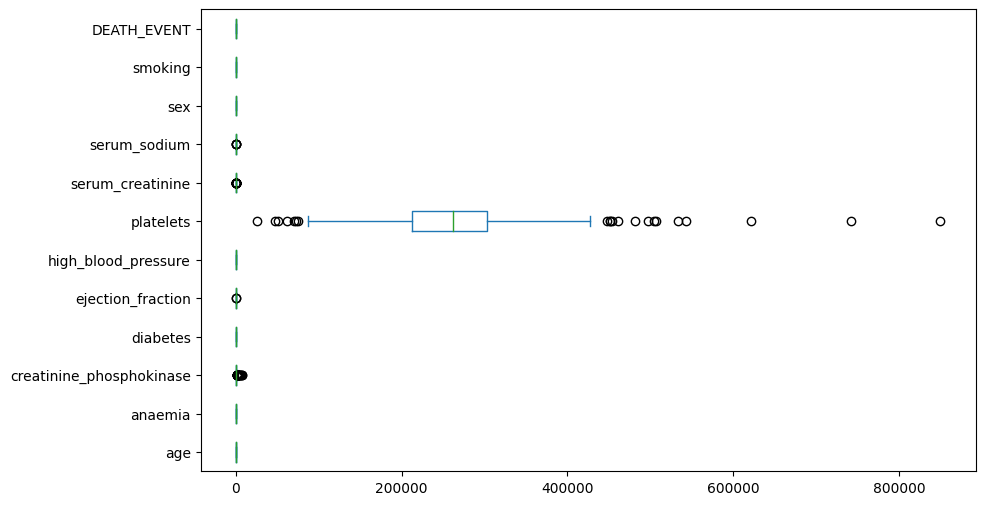

In [ ]:
# prompt: boxplot horizontal  exclude time feature

import matplotlib.pyplot as plt
df_exclude_time = df.drop('time', axis=1)
df_exclude_time.plot(kind='box', vert=False, figsize=(10, 6))
plt.show()


In [ ]:
# prompt: do a min max normalization of age, ejection_fraction, serum_creatinine  only

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns you want to normalize
cols_to_normalize = ['age', 'ejection_fraction', 'serum_creatinine']

# Fit and transform the selected columns
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Print the normalized data
print(df[cols_to_normalize].head())


        age  ejection_fraction  serum_creatinine
0  0.636364           0.090909          0.157303
1  0.272727           0.363636          0.067416
2  0.454545           0.090909          0.089888
3  0.181818           0.090909          0.157303
4  0.454545           0.090909          0.247191


In [ ]:
# prompt: check null value in data

# Check for null values in the DataFrame
print(df.isnull().sum())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [ ]:
# prompt: remove the null values and apply linear regrression to the data except time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Remove rows with null values
df_cleaned = df.dropna()

# Separate features (X) and target (y)
X = df_cleaned.drop(['time', 'DEATH_EVENT'], axis=1)  # Exclude 'time' and 'DEATH_EVENT'
y = df_cleaned['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.22733761604345423
R-squared: 0.06466809399264539


In [ ]:
# prompt: StandardScaler (z-score standardization)

#from sklearn.preprocessing import StandardScaler

# Select the numerical features you want to scale
#numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Create a StandardScaler object
#scaler = StandardScaler()

# Fit and transform the selected features
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled DataFrame
#print(df.head())


In [ ]:
# prompt: Decision Tree on data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        35
           1       0.72      0.52      0.60        25

    accuracy                           0.72        60
   macro avg       0.72      0.69      0.69        60
weighted avg       0.72      0.72      0.71        60



In [ ]:
# prompt: k-Nearest Neighbors on the data

from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.58      0.83      0.68        35
           1       0.40      0.16      0.23        25

    accuracy                           0.55        60
   macro avg       0.49      0.49      0.46        60
weighted avg       0.51      0.55      0.49        60



In [ ]:
# prompt: Mann–Whitney U test  to compare the distribution of each feature between the two groups (survived individuals and dead patients), plus the Shapiro–Wilk test to check the distribution of each feature.

from scipy.stats import mannwhitneyu, shapiro

# Separate data into two groups based on DEATH_EVENT
survived_group = df[df['DEATH_EVENT'] == 0]
dead_group = df[df['DEATH_EVENT'] == 1]

# Perform Mann-Whitney U test and Shapiro-Wilk test for each feature
for feature in df.columns:
  if feature != 'DEATH_EVENT':
    # Shapiro-Wilk test for normality
    shapiro_stat_survived, shapiro_p_survived = shapiro(survived_group[feature])
    shapiro_stat_dead, shapiro_p_dead = shapiro(dead_group[feature])

    # Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(survived_group[feature], dead_group[feature])

    print(f"\nFeature: {feature}")
    print(f"  Shapiro-Wilk test (survived): Statistic={shapiro_stat_survived:.3f}, p-value={shapiro_p_survived:.3f}")
    print(f"  Shapiro-Wilk test (dead): Statistic={shapiro_stat_dead:.3f}, p-value={shapiro_p_dead:.3f}")
    print(f"  Mann-Whitney U test: U-statistic={u_statistic:.3f}, p-value={p_value:.3f}")

    # Interpret results (optional)
    if p_value < 0.05:
      print("  There is a statistically significant difference in the distribution of this feature between the two groups.")
    else:
      print("  There is no statistically significant difference in the distribution of this feature between the two groups.")



Feature: age
  Shapiro-Wilk test (survived): Statistic=0.980, p-value=0.005
  Shapiro-Wilk test (dead): Statistic=0.969, p-value=0.022
  Mann-Whitney U test: U-statistic=7121.000, p-value=0.000
  There is a statistically significant difference in the distribution of this feature between the two groups.

Feature: anaemia
  Shapiro-Wilk test (survived): Statistic=0.624, p-value=0.000
  Shapiro-Wilk test (dead): Statistic=0.636, p-value=0.000
  Mann-Whitney U test: U-statistic=9059.000, p-value=0.253
  There is no statistically significant difference in the distribution of this feature between the two groups.

Feature: creatinine_phosphokinase
  Shapiro-Wilk test (survived): Statistic=0.628, p-value=0.000
  Shapiro-Wilk test (dead): Statistic=0.439, p-value=0.000
  Mann-Whitney U test: U-statistic=9460.000, p-value=0.684
  There is no statistically significant difference in the distribution of this feature between the two groups.

Feature: diabetes
  Shapiro-Wilk test (survived): Statist

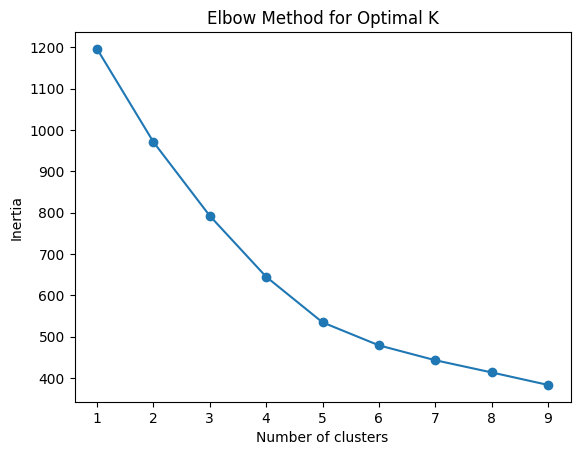

   serum_creatinine  ejection_fraction  serum_sodium       age  Cluster
0          0.157303           0.090909           130  0.636364        0
1          0.067416           0.363636           136  0.272727        0
2          0.089888           0.090909           129  0.454545        0
3          0.157303           0.090909           137  0.181818        0
4          0.247191           0.090909           116  0.454545        0
Silhouette Score: 0.2337017272564005


In [ ]:
# prompt: cluster the significant features and select the optimal number of clusters by plotting inertia (sum of squared distances to cluster centers) against the number of clusters.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features to cluster on (e.g., continuous variables like age, serum_creatinine, ejection_fraction)
features = df[['serum_creatinine', 'ejection_fraction', 'serum_sodium','age']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means with an optimal K (e.g., K=3 from the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Show the clustering results
print(df[['serum_creatinine', 'ejection_fraction','serum_sodium','age', 'Cluster']].head())

# Evaluate the silhouette score for the clustering
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Cluster
0    0.316940
1    0.296296
2    0.750000
Name: DEATH_EVENT, dtype: float64


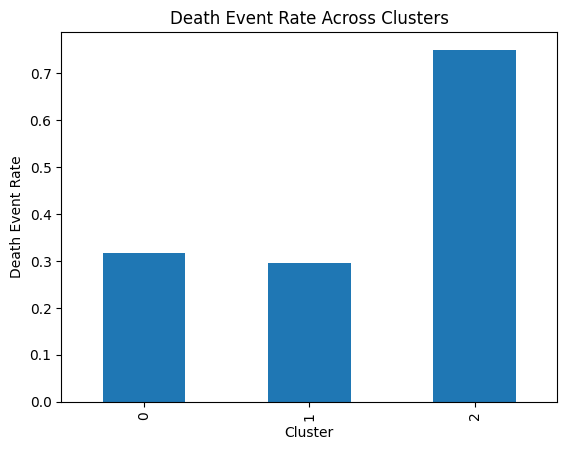

In [ ]:
# prompt: check distribution of death event across clusters

import matplotlib.pyplot as plt
# Group the data by cluster and calculate the death event rate
cluster_death_event_rates = df.groupby('Cluster')['DEATH_EVENT'].mean()

# Print the death event rates for each cluster
print(cluster_death_event_rates)

# You can also visualize this using a bar plot
cluster_death_event_rates.plot(kind='bar')
plt.title('Death Event Rate Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Death Event Rate')
plt.show()


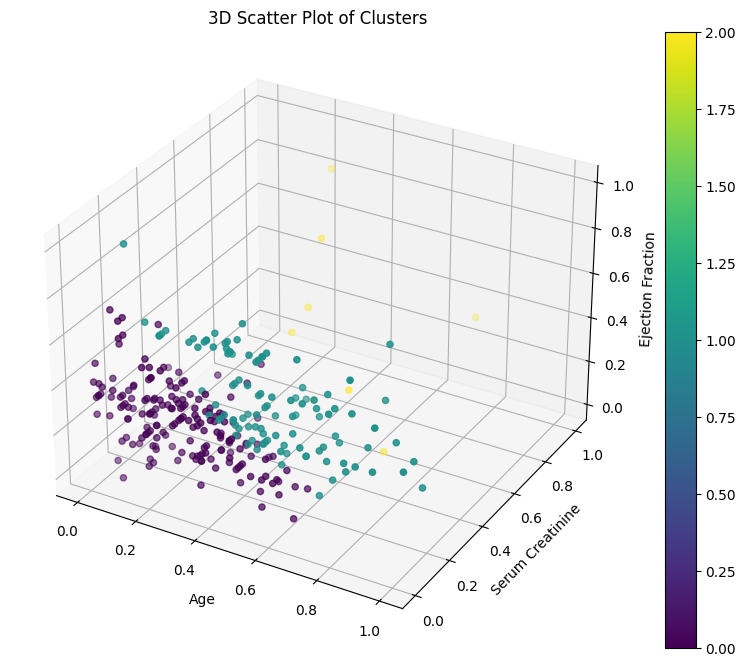

In [ ]:
# prompt: a 3d scatter plot of the clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have 'age', 'serum_creatinine', and 'ejection_fraction' as features
# You can replace these with your chosen features for the 3D plot

scatter = ax.scatter(df['age'], df['serum_creatinine'], df['ejection_fraction'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Serum Creatinine')
ax.set_zlabel('Ejection Fraction')
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar to show the mapping between cluster labels and colors
plt.colorbar(scatter)

plt.show()


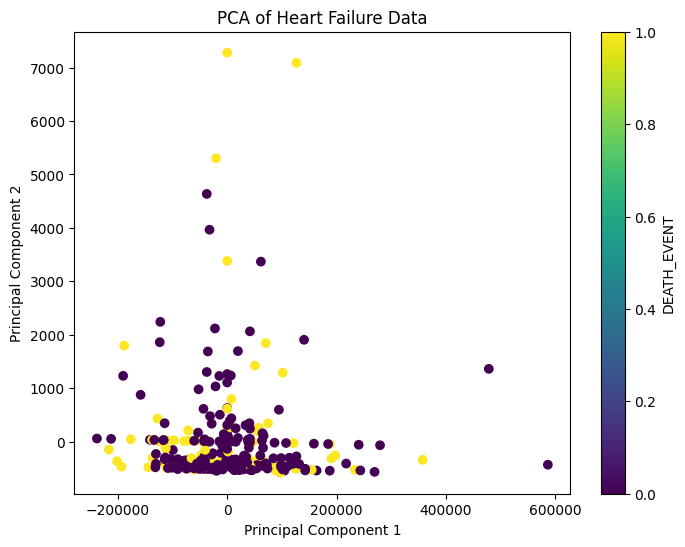

[9.99901016e-01 9.83519884e-05]


In [ ]:
# prompt: plot pca

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' contains your feature data (excluding the target variable)
X = df.drop('DEATH_EVENT', axis=1)

# Create a PCA object with the desired number of components (e.g., 2)
pca = PCA(n_components=2)

# Fit and transform the data
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df['DEATH_EVENT'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Failure Data')
plt.colorbar(label='DEATH_EVENT')
plt.show()

# Explained variance ratio
print(pca.explained_variance_ratio_)


In [ ]:
# prompt: using significant features apply random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Identify significant features based on your previous analysis (e.g., Mann-Whitney U test, feature importance from other models)
significant_features = ['ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium']

# Create a new DataFrame with only significant features and the target variable
X = df[significant_features]
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_rf))

# get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
for feature, importance in zip(significant_features, feature_importances):
  print(f"{feature}: {importance}")


Random Forest Accuracy: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.68      0.68        60

ejection_fraction: 0.25892844842011886
serum_creatinine: 0.3330643177809614
age: 0.23721262448678188
serum_sodium: 0.17079460931213775


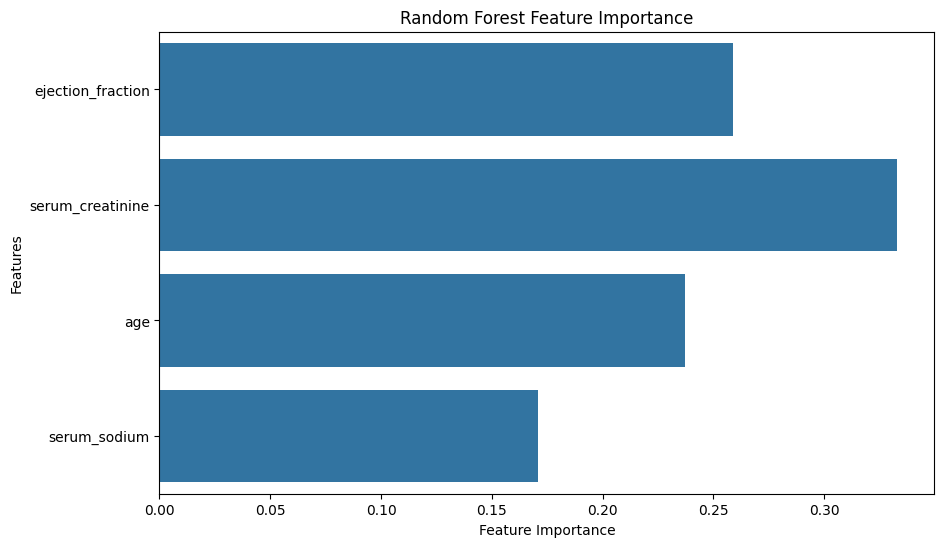

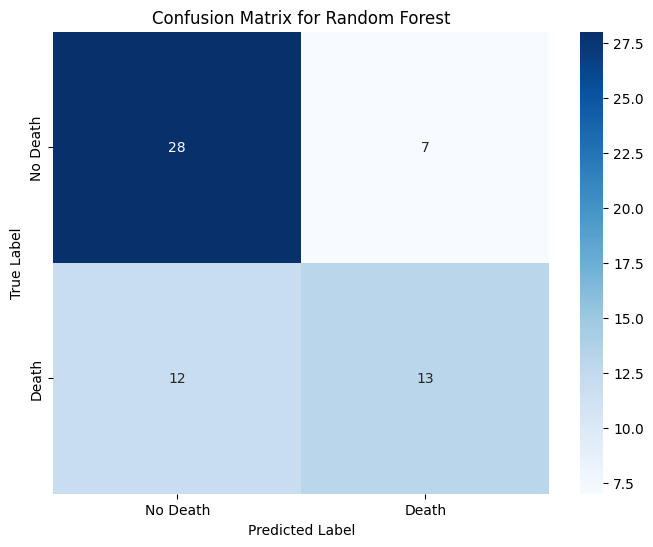

In [ ]:
# prompt: plot the random forest and a labelled confusion matrix  both

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=significant_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Interpreting Model Performance

Accuracy: The ratio of correctly predicted observations to the total observations. In this case, how well the model predicts whether the patient dies or survives.

Confusion Matrix:

True Positives (TP): Patients who died and were correctly predicted as dead.
True Negatives (TN): Patients who survived and were correctly predicted as survivors.
False Positives (FP): Patients who survived but were incorrectly predicted as dead.
False Negatives (FN): Patients who died but were incorrectly predicted as survivors.

Logistic Regression Accuracy: 0.6333333333333333
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        35
           1       1.00      0.12      0.21        25

    accuracy                           0.63        60
   macro avg       0.81      0.56      0.49        60
weighted avg       0.77      0.63      0.53        60

Logistic Regression ROC AUC: 0.7405714285714287


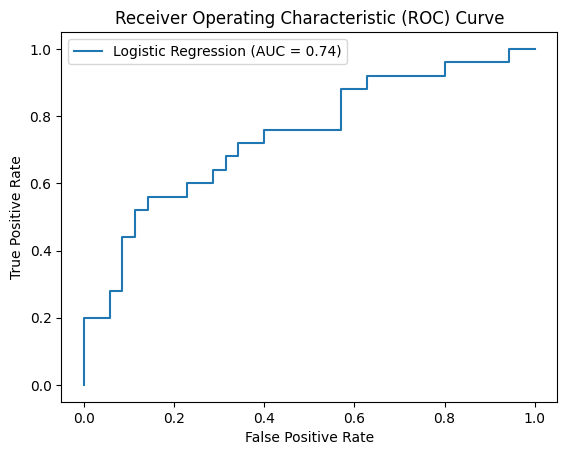

In [ ]:
# prompt: apply logistic regression to the features

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Assuming 'X' contains your feature data and 'y' contains your target variable
X = df[significant_features]
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_logistic))


# Calculate the ROC AUC score
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
print(f"Logistic Regression ROC AUC: {roc_auc_logistic}")

# Plot the ROC curve
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_proba_logistic)
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


